In [65]:
import torch
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
import numpy as np
from  torch.nn.modules.upsampling import Upsample
from matplotlib import pyplot as plt

In [16]:
seed = 1234
np.random.seed(seed)
torch_gen = torch.Generator()
torch_gen.manual_seed(seed)
torch.manual_seed(seed)

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cuda



Initialize AlexNet

In [18]:
model = torchvision.models.AlexNet().to(device)

Download CIFAR-10

In [73]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize(size = (224,224)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

unsplit_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform = transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


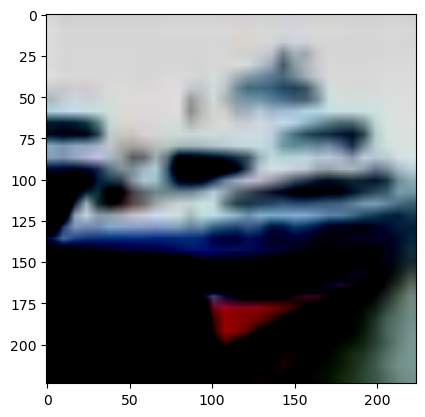

In [74]:
# plt.imshow(np.transpose(testset[1][0].numpy(),(1,2,0)))

In [75]:
seed = 1234
np.random.seed(seed)
torch_gen = torch.Generator()
torch_gen.manual_seed(seed)
torch.manual_seed(seed)
noise_level = 1
batch_size = 4

# trainset = curr_dataset.trainset
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2,)

# valset = curr_dataset.valset
# valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [76]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 0 %
